# Data description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

Task is to make a model that can consider the data provided and predict the Average Price.

# Importing required libraries

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [240]:
df=pd.read_csv('avocado.csv')

In [241]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [242]:
df.shape

(1517, 13)

we have 1517 rows and 13 columns

In [243]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [244]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [245]:
df['Date'] = pd.to_datetime(df['Date'])

In [246]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [247]:
df['Month'] = df['Date'].dt.month

In [248]:
df.drop('Date',axis=1,inplace=True)

We have extracted the month from the date and dropped the date column.

In [249]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [250]:
#Renaming the columns
df = df.rename(columns = {'4046': 'Small','4225':'Large','4770':'Xtra Large','type':'Type','year':'Year','region':'Region'})

In [251]:
df

,AveragePrice,Total Volume,Small,Large,Xtra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10
11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9


In [252]:
df.dtypes

AveragePrice    float64
Total Volume    float64
Small           float64
Large           float64
Xtra Large      float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
Type             object
Year              int64
Region           object
Month             int64
dtype: object

We need to convert the data type of Type and Region from object to int or float

In [253]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
Small           0
Large           0
Xtra Large      0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
Type            0
Year            0
Region          0
Month           0
dtype: int64

There are no null values

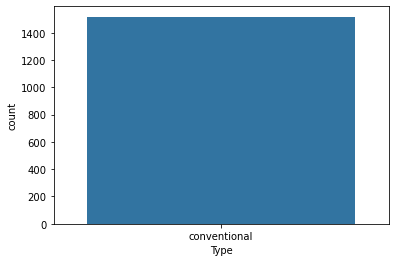

conventional    1517
Name: Type, dtype: int64


In [254]:
sns.countplot(df['Type'])
plt.show()
print(df['Type'].value_counts())

There is only 1 type , which is conventional

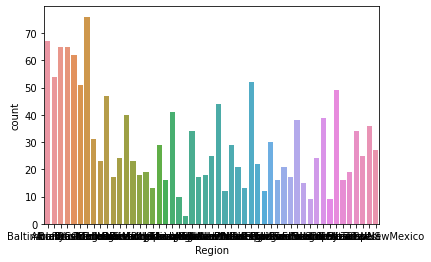

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [255]:
sns.countplot(df['Region'])
plt.show()
print(df['Region'].value_counts())

Highest number of Avocado has been sold in California and least number of avocado in LosAngeles

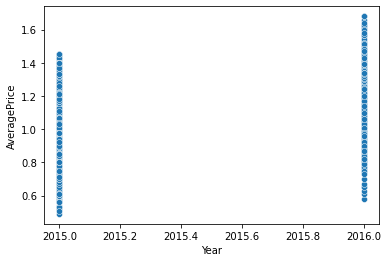

In [256]:
sns.scatterplot(x=df['Year'],y=df['AveragePrice'])
plt.show()

Average price of Avocado was more in 2016 as compared to 2015

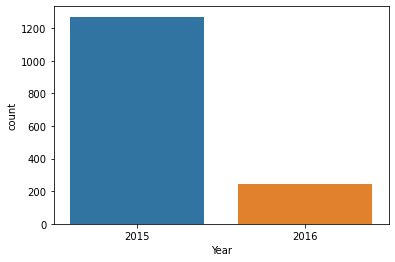

2015    1270
2016     247
Name: Year, dtype: int64


In [257]:
sns.countplot(df['Year'])
plt.show()
print(df['Year'].value_counts())

Avocado sales was more in 2015 as compared to 2016.

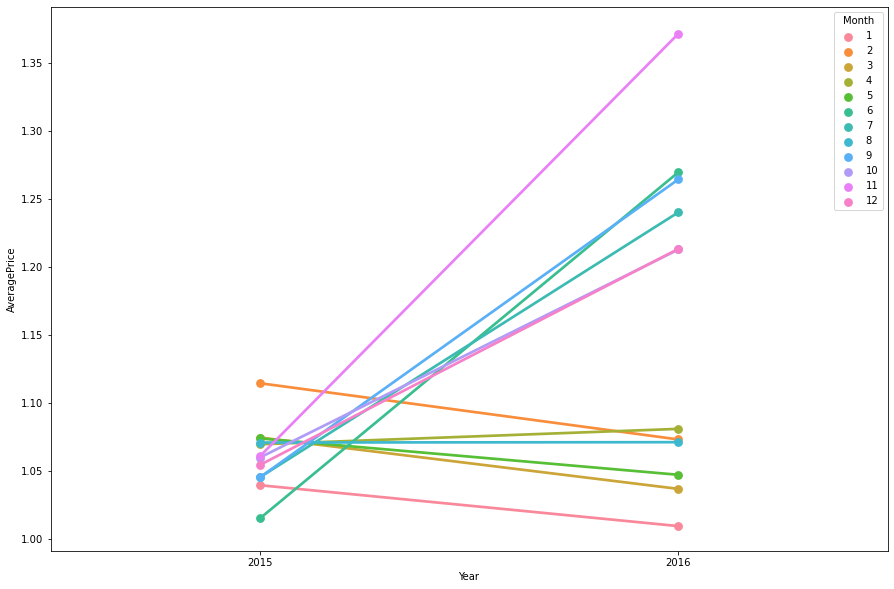

In [258]:
plt.figure(figsize=(15, 10))
sns.pointplot(x = 'Year', y = 'AveragePrice', data = df, hue = 'Month', ci = False)
plt.show()

Observations
- Average Price was reduced in January 2016, Feb 2016, March 2016, as compared to 2015.
- Average price increased in April 2016 as compared to April 2015.
- Average price decreased in May 2016 as compared to May 2015
- Average price increased in June 2016 as compared to June 2015.
- Average price increased in July 2016 as compared to July 2015.
- Average price increased in August 2016 as compared to August 2015.
- Average price increased in September 2016 as compared to sept 2015
- Average price decreased in October 2016 as compared to Oct 2015.
- Average price increased in November 2016 as compared to Nov 2015
- Average price increased in Dec 2016 as compared to Dec 2015.

# Encoding of DataFrame

In [259]:
from sklearn.preprocessing import OrdinalEncoder

In [260]:
oe = OrdinalEncoder()

In [261]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [262]:
df

,AveragePrice,Total Volume,Small,Large,Xtra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015,0.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015,0.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015,0.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015,0.0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0.0,2016,7.0,10
11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0.0,2016,7.0,9
12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0.0,2016,7.0,2
13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0.0,2016,7.0,9


# Checking the Outliers and Data distribution

In [263]:
df.describe()

,AveragePrice,Total Volume,Small,Large,Xtra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440,6.362558
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398,3.472146
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000,12.000000


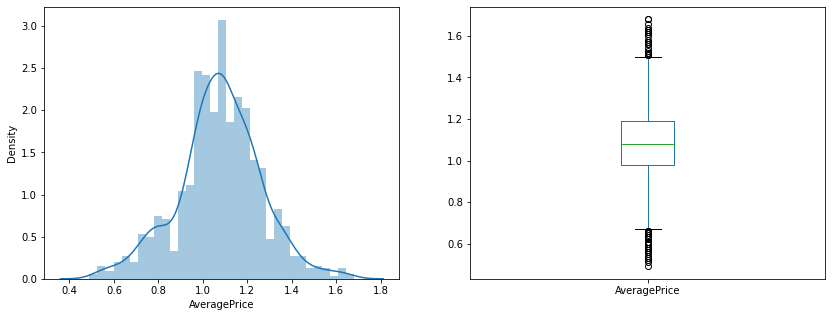

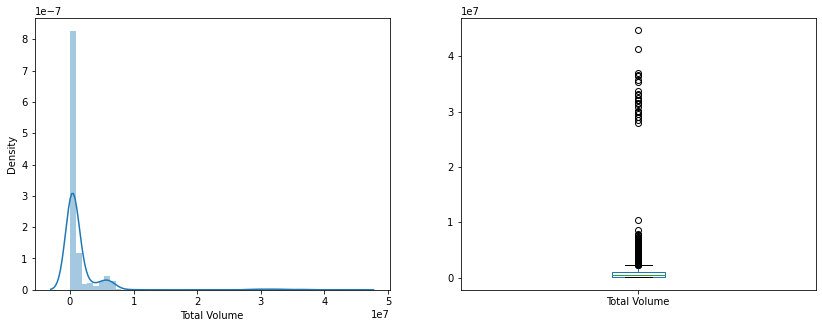

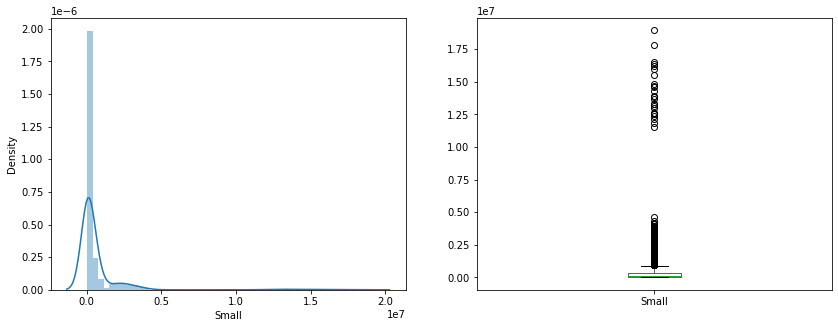

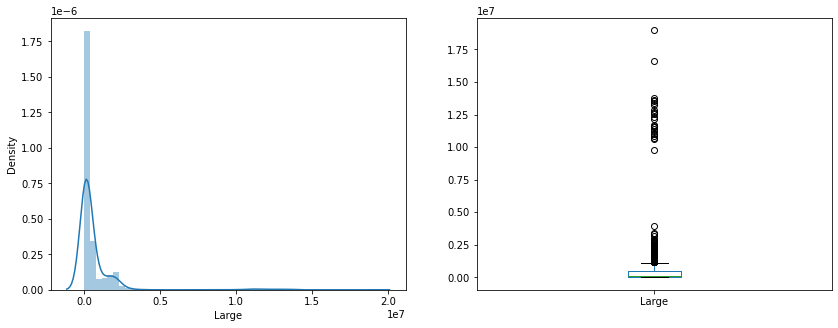

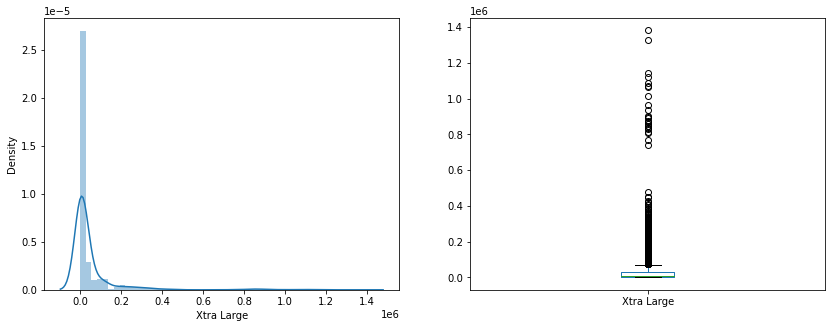

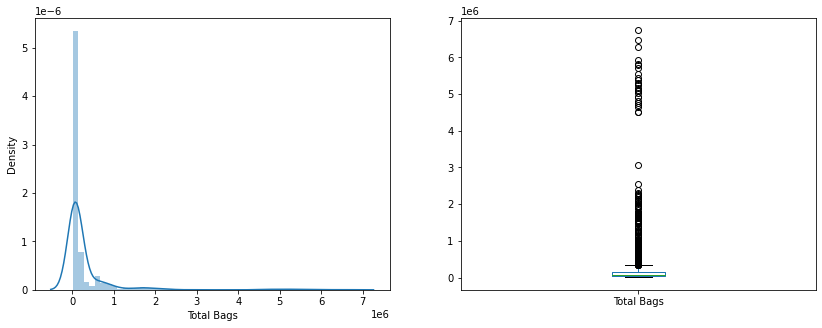

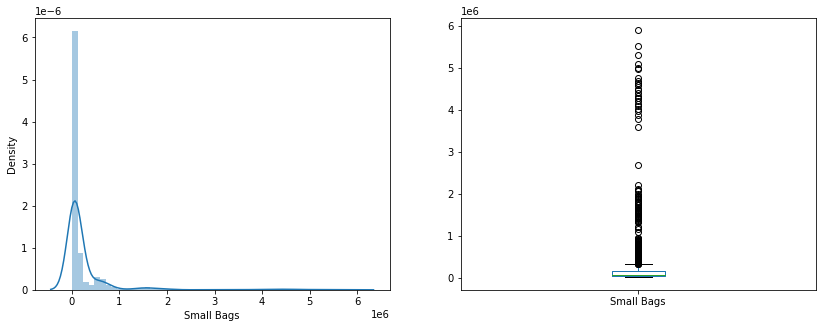

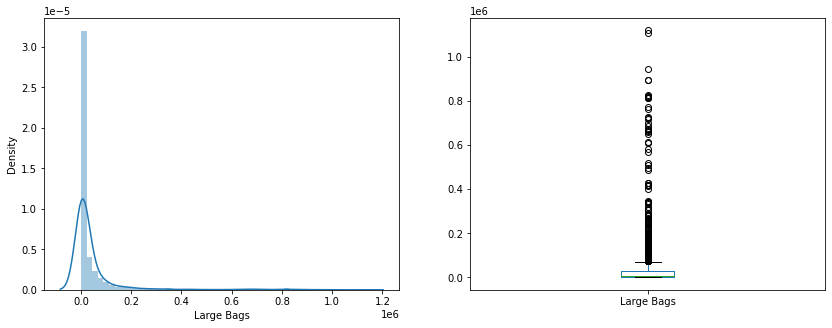

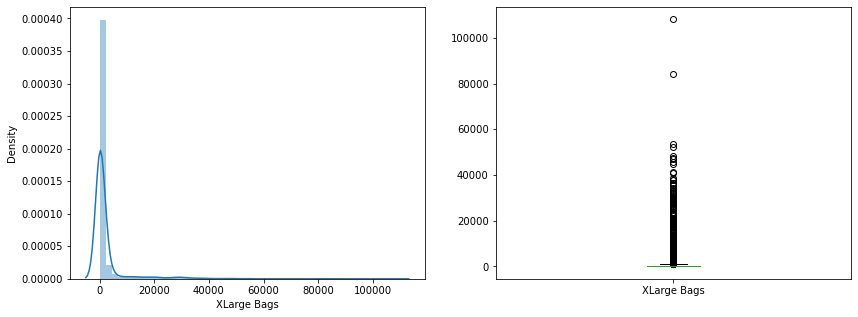

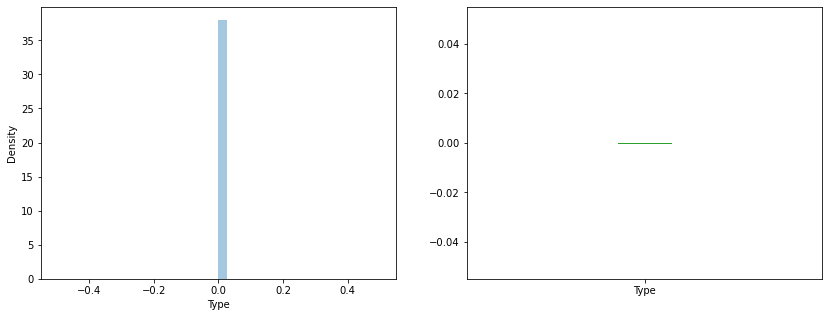

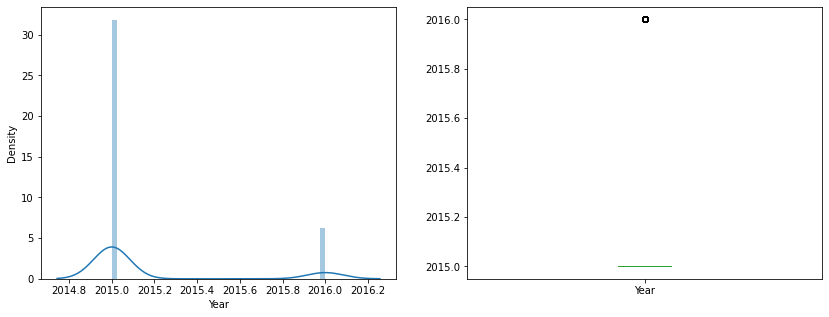

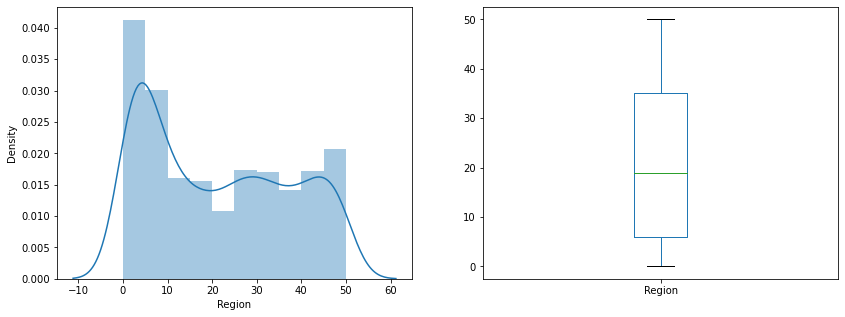

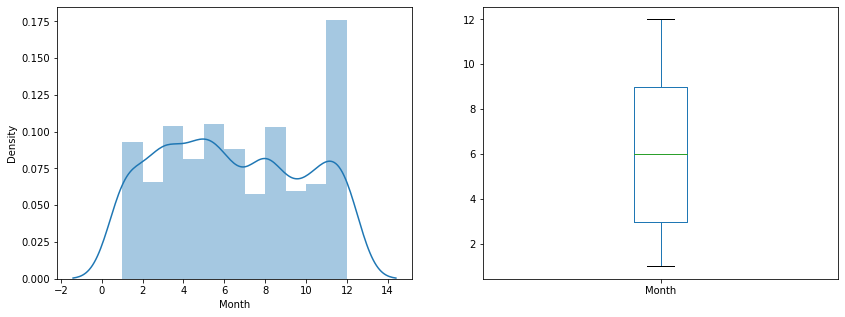

<Figure size 1008x360 with 0 Axes>

In [264]:
for i in range(0,len(df.columns)):
    plt.subplot(121)
    sns.distplot(df[df.columns[i]])
    plt.subplot(122)
    df[df.columns[i]].plot.box(figsize=(14,5))
    plt.figure(figsize=(14,5))
    
plt.show()

In [265]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
Small           6.051830
Large           6.394926
Xtra Large      5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Type            0.000000
Year            1.828332
Region          0.288146
Month           0.101439
dtype: float64

Data seems skewed and there are too many outliers, hence we will check them and treat them separately.

# Checking the correlation

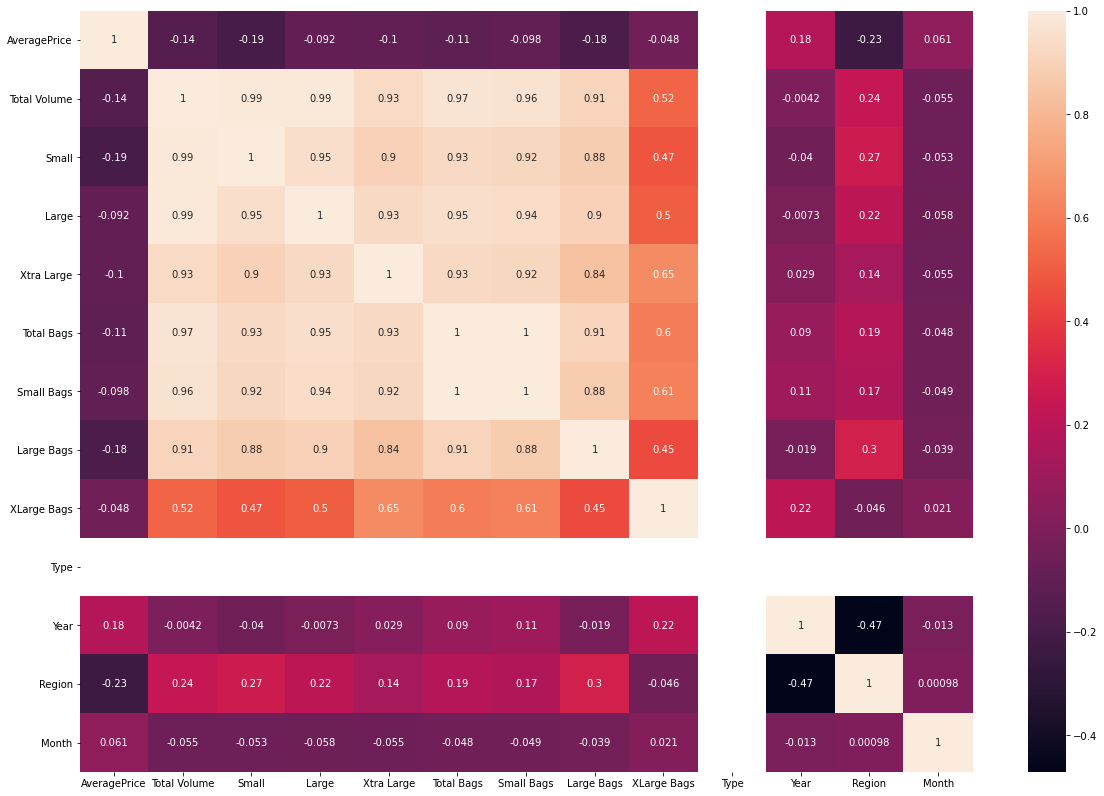

In [266]:
plt.figure(figsize=[20,14])
sns.heatmap(df.corr(), annot = True)
plt.show()

Observations
- Total volume is positively correlated to small, large, extra large,Total bas, small bags and Large bags.
- small is positively correlated to Total volume,large, xtra large,Total bags,small bags,Large bags
- Large is positively correlated to Large bags,small,Total bags,Xtra Large, Small, Total volume
- Xtra Large is positively correlated to Large bags,small bags, Total bags,Large,small,Total volume
- Total Bags is positively correlated to Large bags, small bags,X large,Large,Small,Total volume.
- Small Bags is positively correlated to Large bags, Total bags, Xtra Large, Large,Small,Total volume
- Large Bags is positively correlated to Small Bags,Total Bags, Xtra Large,Large,Small,Total volume
- Xtra large bags is positively correlated to Large bags,Small bags,Total bags, Xtra Large,Large,Small, Total volume

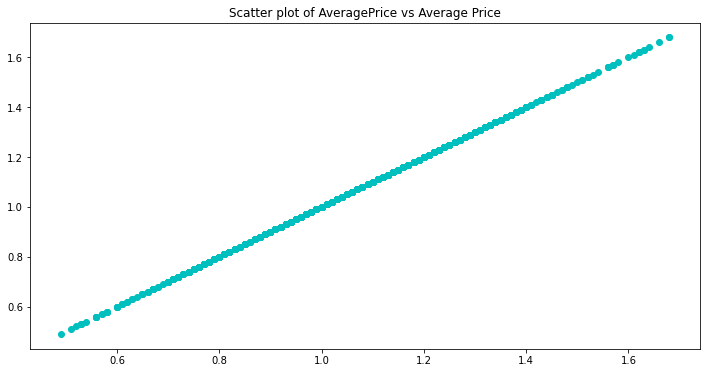

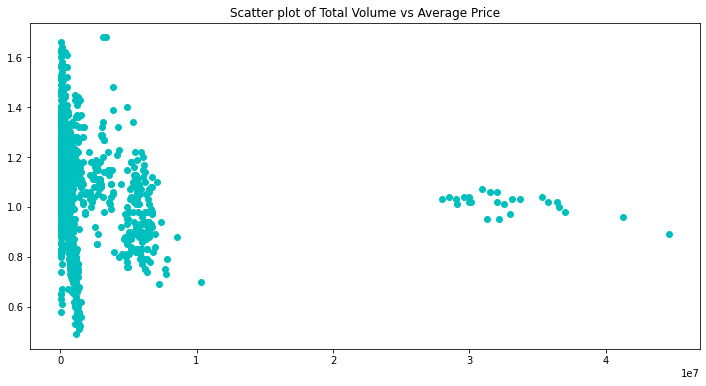

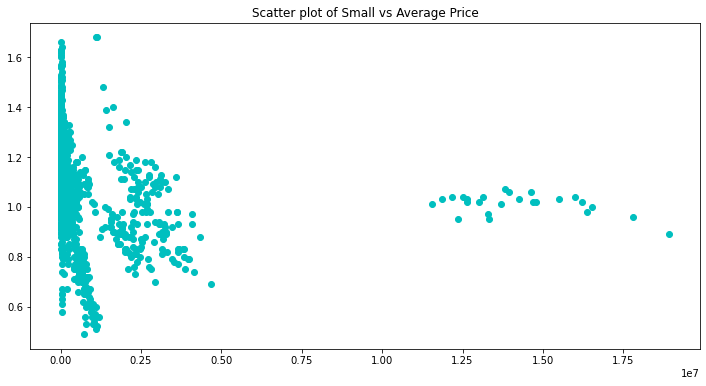

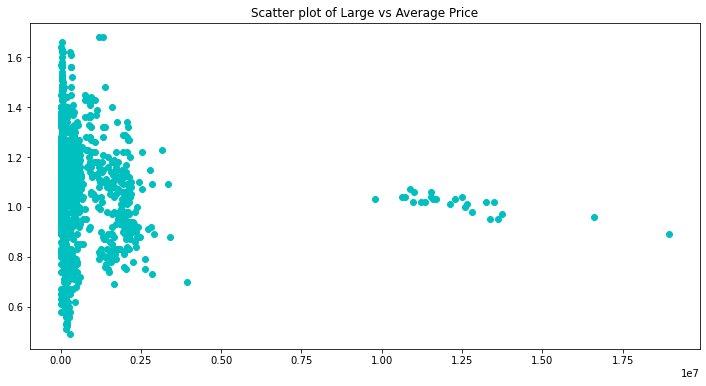

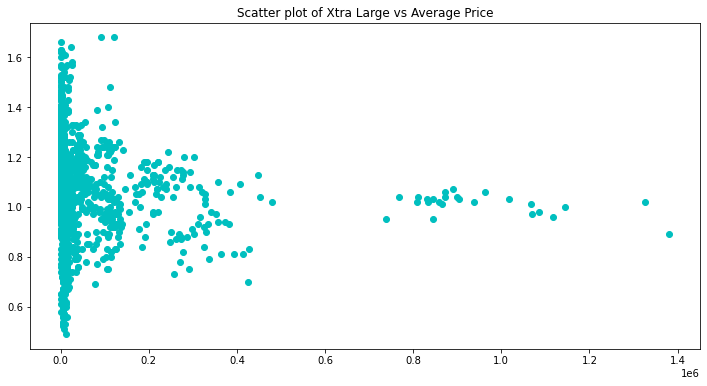

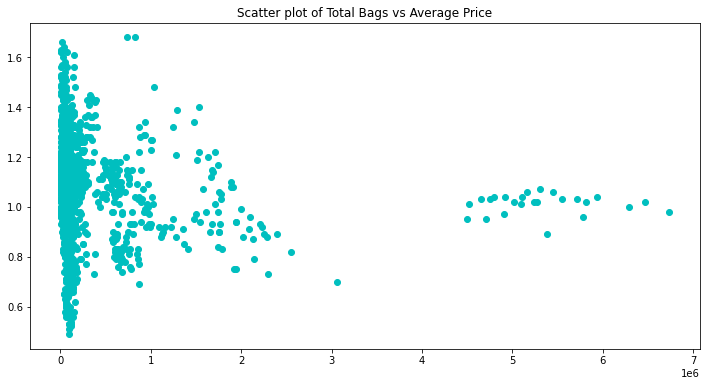

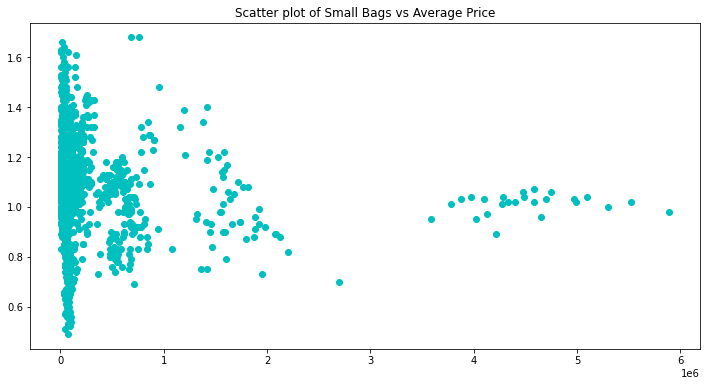

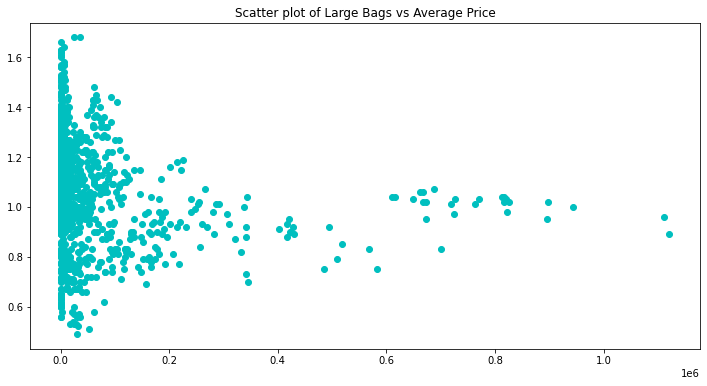

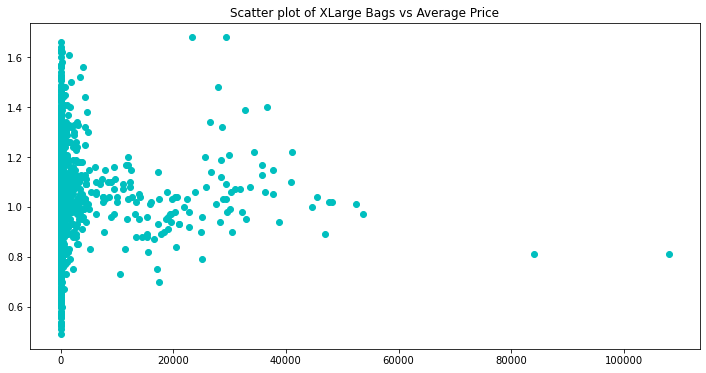

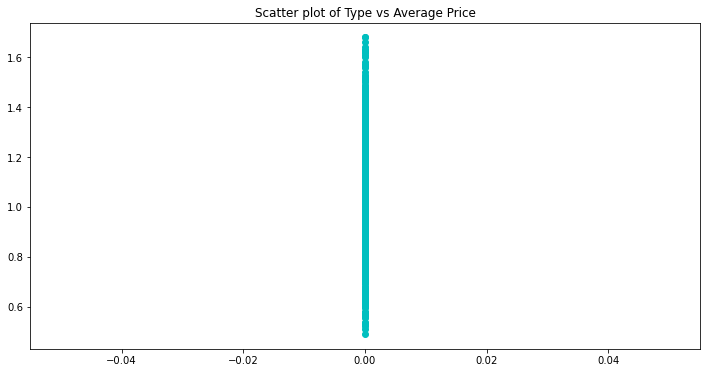

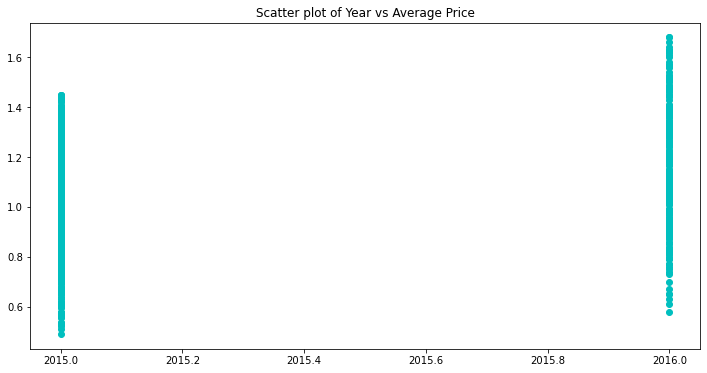

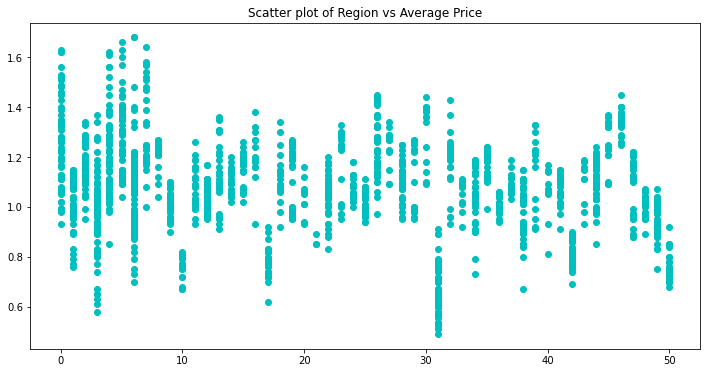

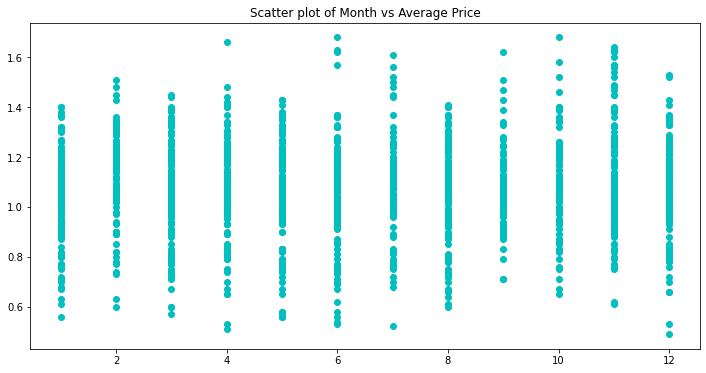

In [267]:
for i in df.columns:
    plt.figure(figsize=[12,6])
    plt.scatter(x = df[i] ,y = df['AveragePrice'] , color = 'c')
    plt.title('Scatter plot of {} vs Average Price'.format(i))
    plt.show()

There dont seem any relation between Features and target variable.

<Figure size 1008x576 with 0 Axes>

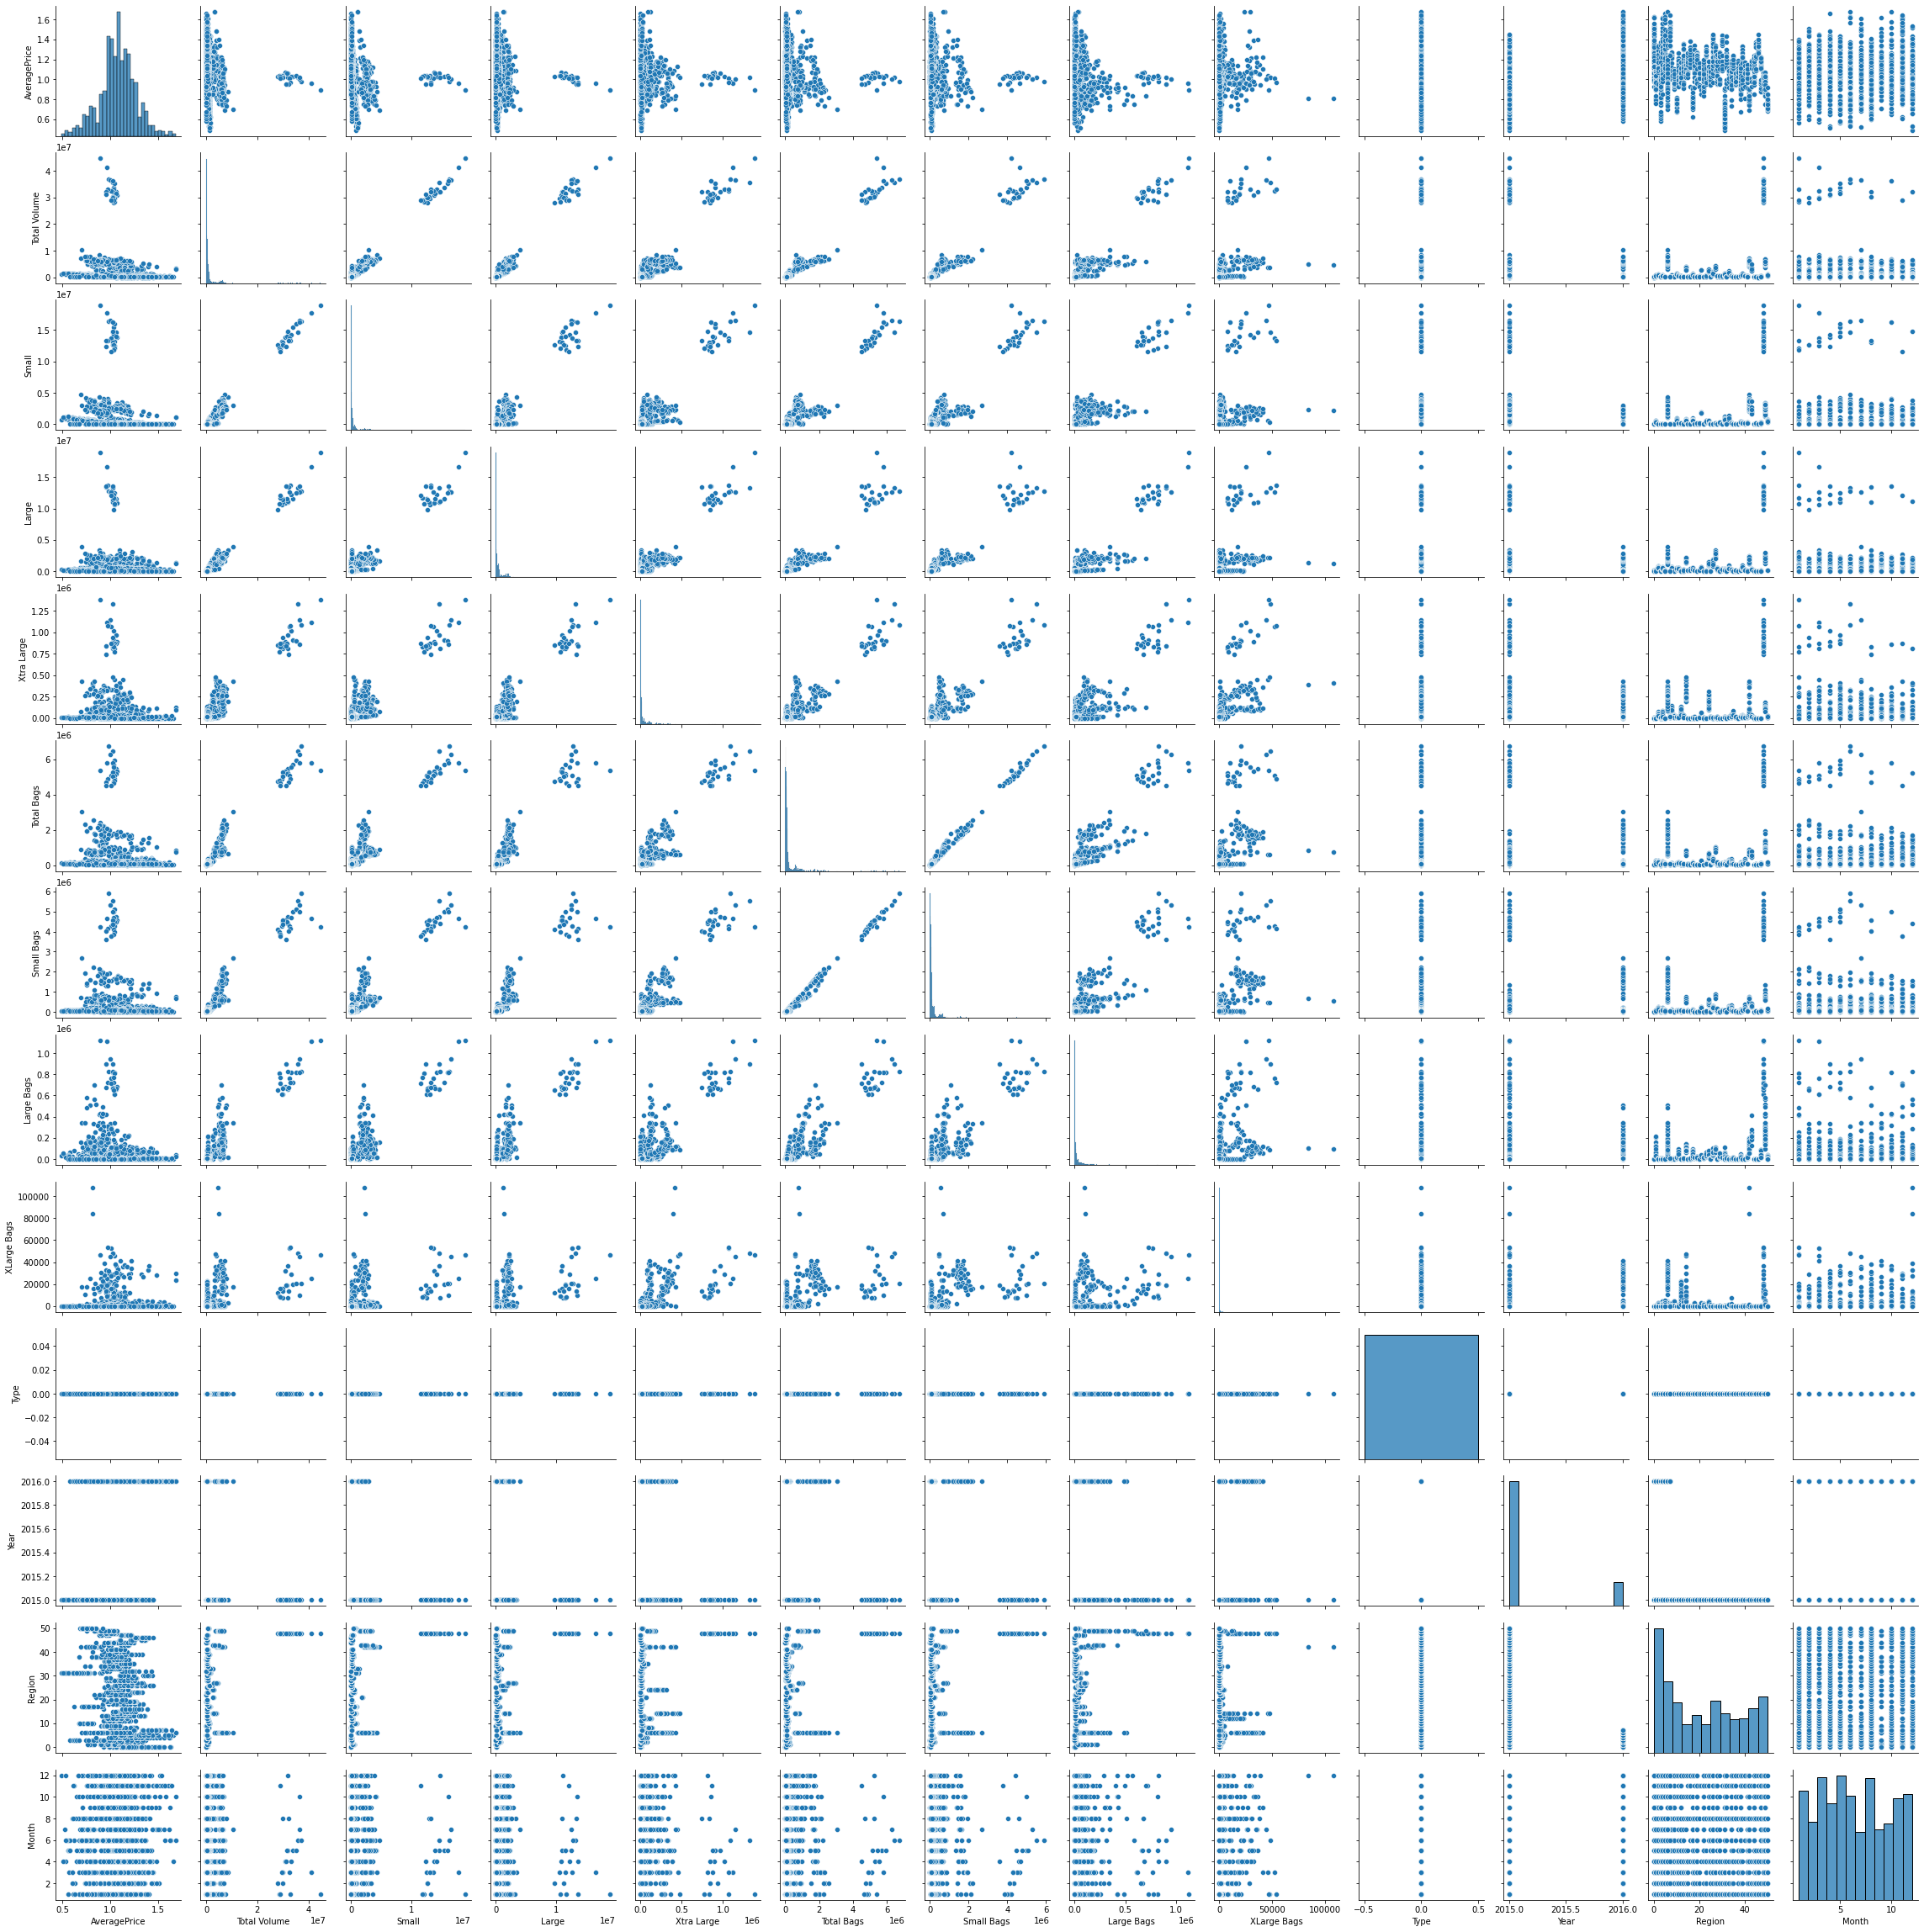

In [268]:
plt.figure(figsize=[14,8])
sns.pairplot(df)
plt.show()

We are not able to analyse anything from this graph as there are too many columns in the dataset

In [269]:
df_c=df.corr()
dc=set()
for i in range(len(df_c.columns)):
    for j in range(i):
        if abs(df_c.iloc[i,j])>0.95:
            cname = df_c.columns[i]
            dc.add(cname)

In [270]:
dc

{'Large', 'Small', 'Small Bags', 'Total Bags'}

So, Large, Small, Small Bags and Total Bags are highly correlated variables.

# Removing the outliers

In [271]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
Small           6.051830
Large           6.394926
Xtra Large      5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Type            0.000000
Year            1.828332
Region          0.288146
Month           0.101439
dtype: float64

As data is highly skewed, we will apply IQR method to remove skewness.

In [272]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Small', 'Large', 'Xtra Large',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type', 'Year',
       'Region', 'Month'],
      dtype='object')

In [273]:
columns=['Total Volume', 'Small', 'Large', 'Xtra Large',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type', 'Year',
       'Region', 'Month']
for i in df[columns]:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bridge = df[i].quantile(0.25)-(IQR*3)
    upper_bridge = df[i].quantile(0.75)+(IQR*3)
    print('Lower bridge for',i,'is',lower_bridge),print('Upper_bridge for',i,'is',upper_bridge)

Lower bridge for Total Volume is -2356045.2800000003
Upper_bridge for Total Volume is 3485490.35
Lower bridge for Small is -1051134.0799999998
Upper_bridge for Small is 1449112.9
Lower bridge for Large is -1289546.78
Upper_bridge for Large is 1816173.1800000002
Lower bridge for Xtra Large is -83856.9
Upper_bridge for Xtra Large is 113935.45
Lower bridge for Total Bags is -328001.48
Upper_bridge for Total Bags is 521818.05
Lower bridge for Small Bags is -319689.17000000004
Upper_bridge for Small Bags is 495615.74
Lower bridge for Large Bags is -85640.04999999999
Upper_bridge for Large Bags is 115448.45999999999
Lower bridge for XLarge Bags is -1204.44
Upper_bridge for XLarge Bags is 1605.92
Lower bridge for Type is 0.0
Upper_bridge for Type is 0.0
Lower bridge for Year is 2015.0
Upper_bridge for Year is 2015.0
Lower bridge for Region is -81.0
Upper_bridge for Region is 122.0
Lower bridge for Month is -15.0
Upper_bridge for Month is 27.0


In [274]:
data=df.copy()
data.loc[data['Total Volume']> 3485490.35,'Total Volume'] = 3485490.35
data.loc[data['Small']>1449112.9,'Small'] = 1449112.9
data.loc[data['Large']>1816173.1800000002,'Large'] = 1816173.1800000002
data.loc[data['Xtra Large']>113935.45, 'Xtra Large'] = 113935.45
data.loc[data['Total Bags']>521818.05,'Total Bags'] = 521818.05
data.loc[data['Small Bags']>495615.74,'Small Bags'] = 495615.74
data.loc[data['Large Bags']>115448.45999999999,'Large Bags'] = 115448.45999999999
data.loc[data['XLarge Bags']>1605.92,'XLarge Bags'] = 1605.92
data.loc[data['Region']>122.0,'Region'] = 122.0
data.loc[data['Month']>27.0,'Month'] = 27.0

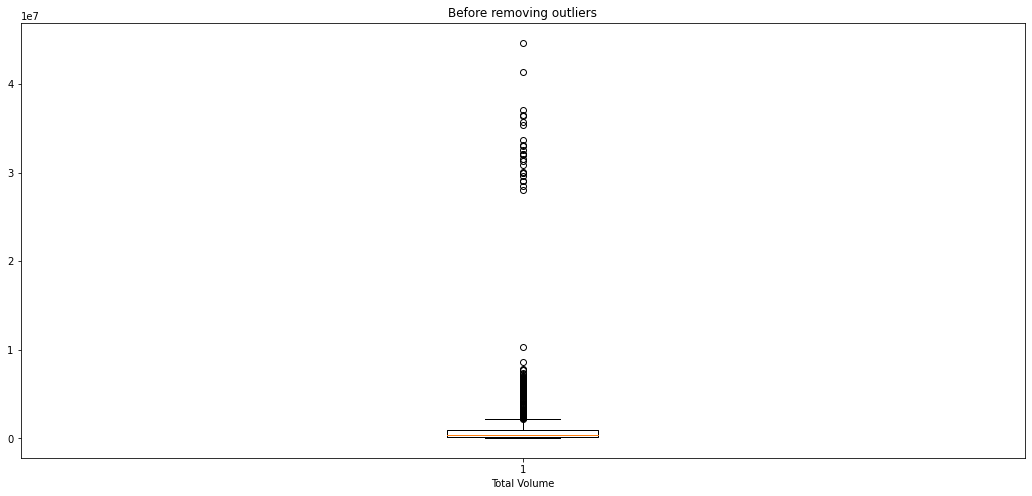

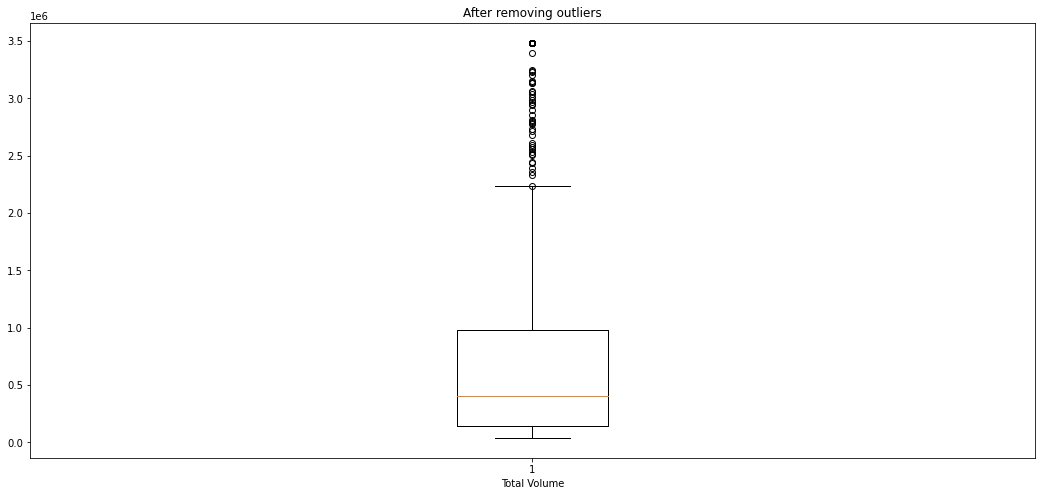

In [275]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Total Volume'])
plt.xlabel('Total Volume')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Total Volume'])
plt.xlabel('Total Volume')
plt.title('After removing outliers')
plt.show()

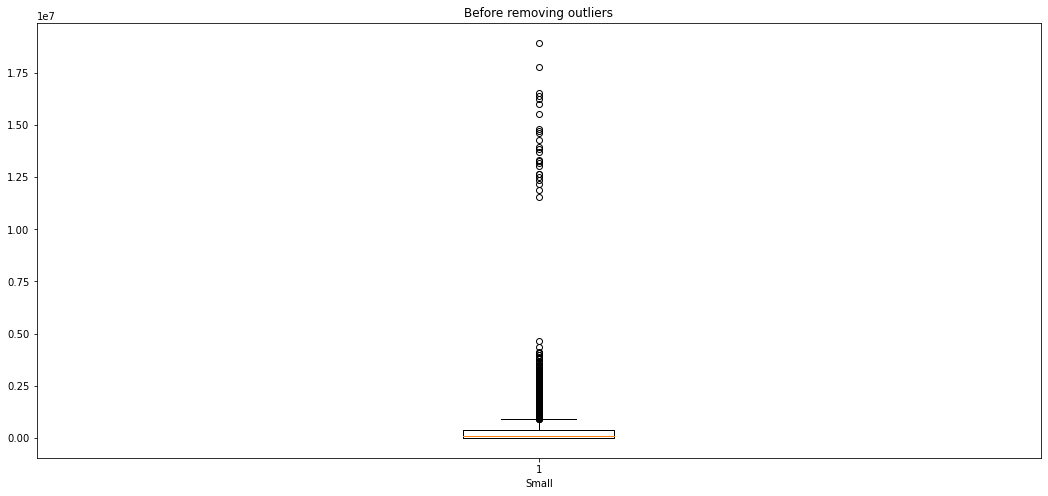

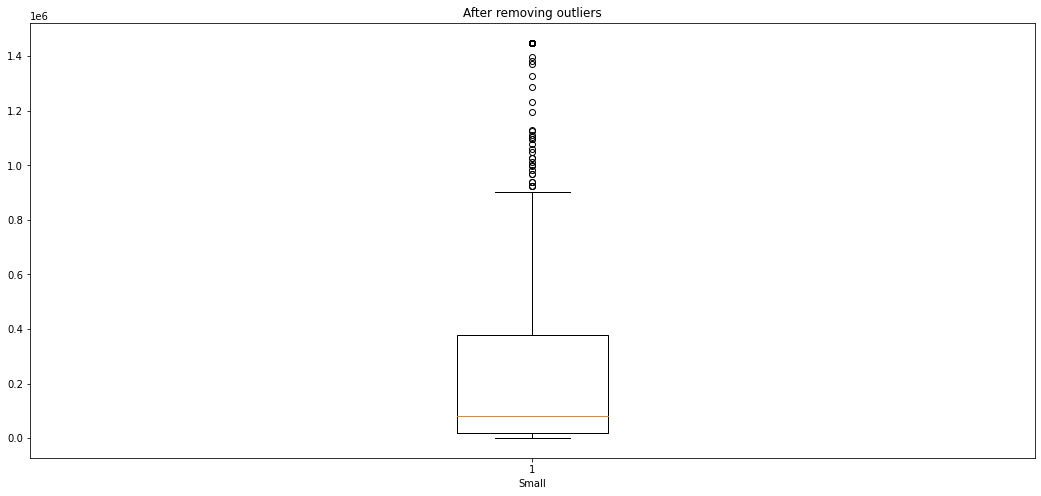

In [276]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Small'])
plt.xlabel('Small')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Small'])
plt.xlabel('Small')
plt.title('After removing outliers')
plt.show()

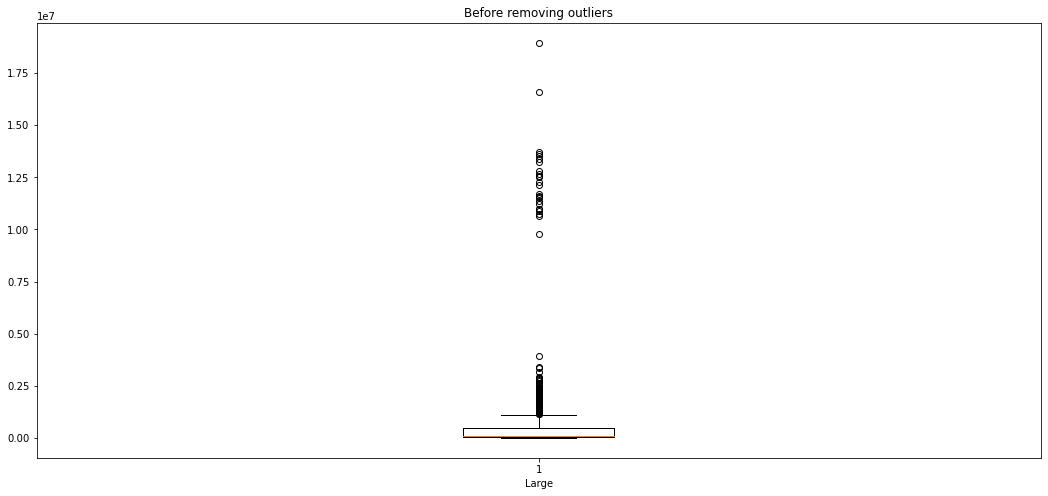

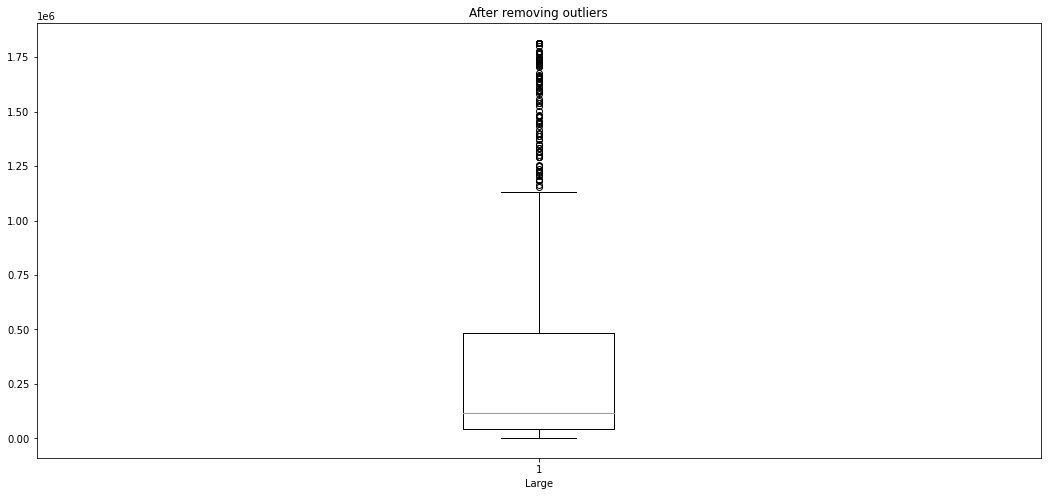

In [277]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Large'])
plt.xlabel('Large')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Large'])
plt.xlabel('Large')
plt.title('After removing outliers')
plt.show()

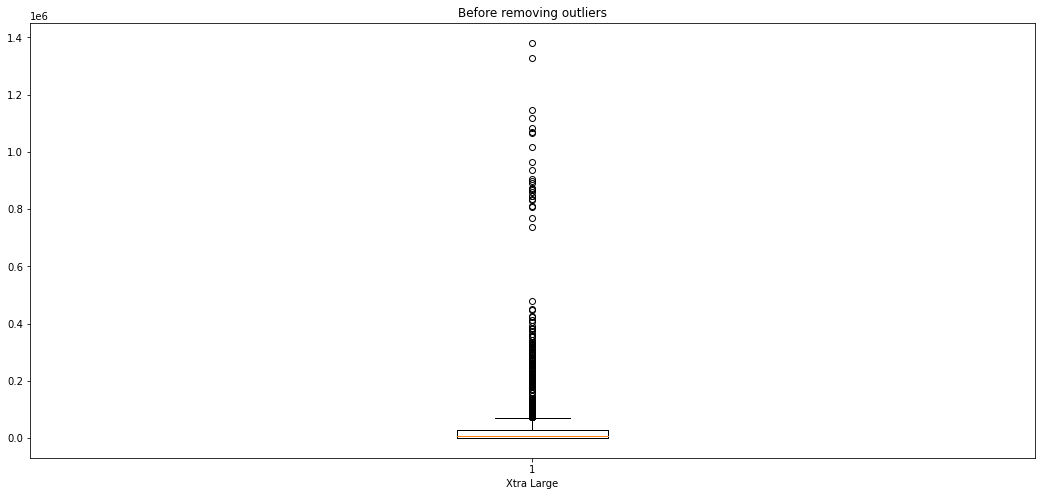

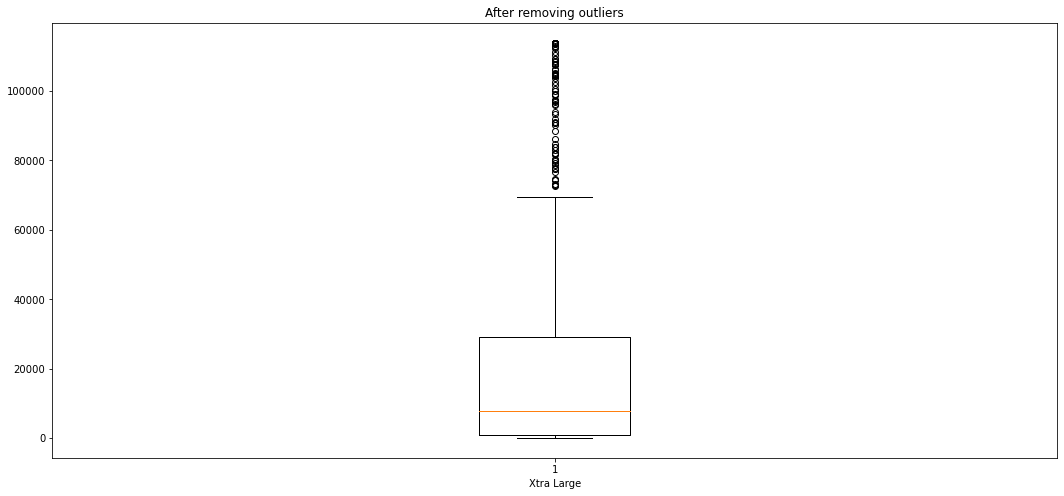

In [278]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Xtra Large'])
plt.xlabel('Xtra Large')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Xtra Large'])
plt.xlabel('Xtra Large')
plt.title('After removing outliers')
plt.show()

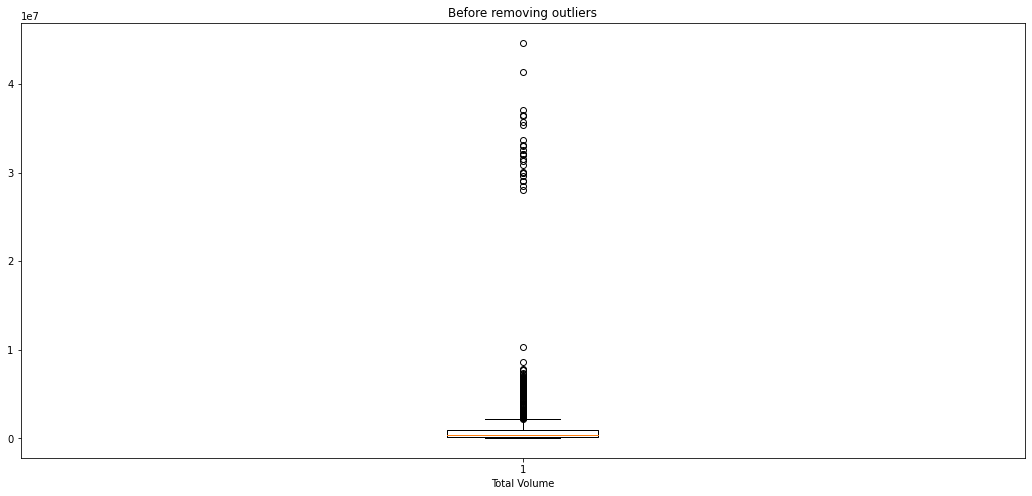

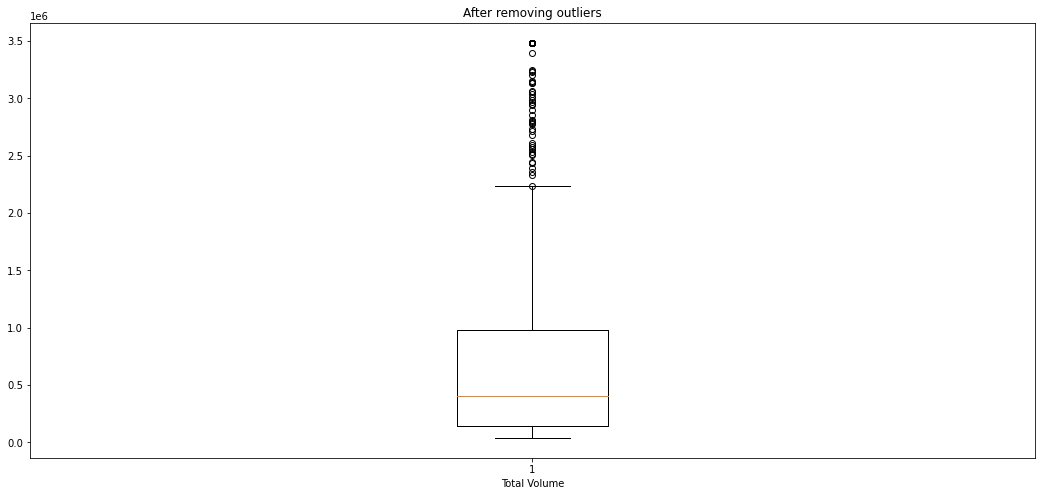

In [279]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Total Volume'])
plt.xlabel('Total Volume')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Total Volume'])
plt.xlabel('Total Volume')
plt.title('After removing outliers')
plt.show()

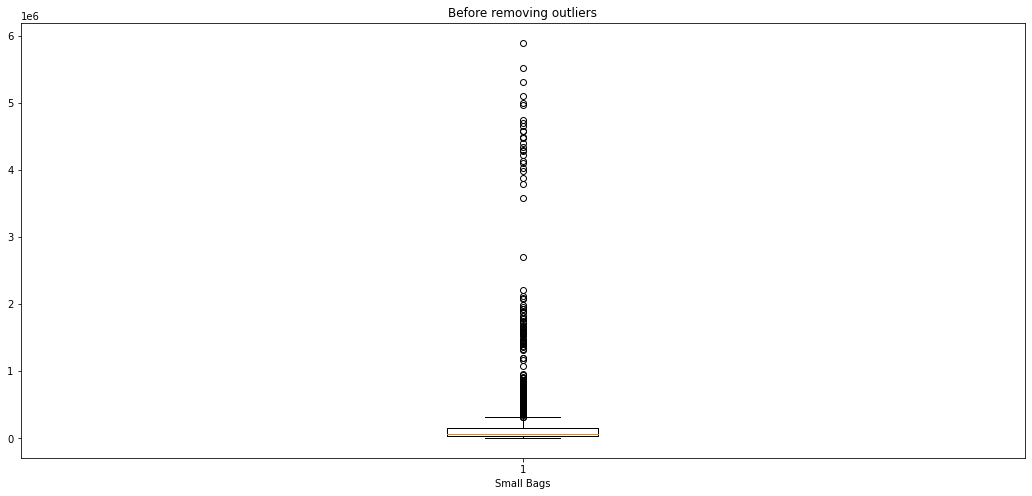

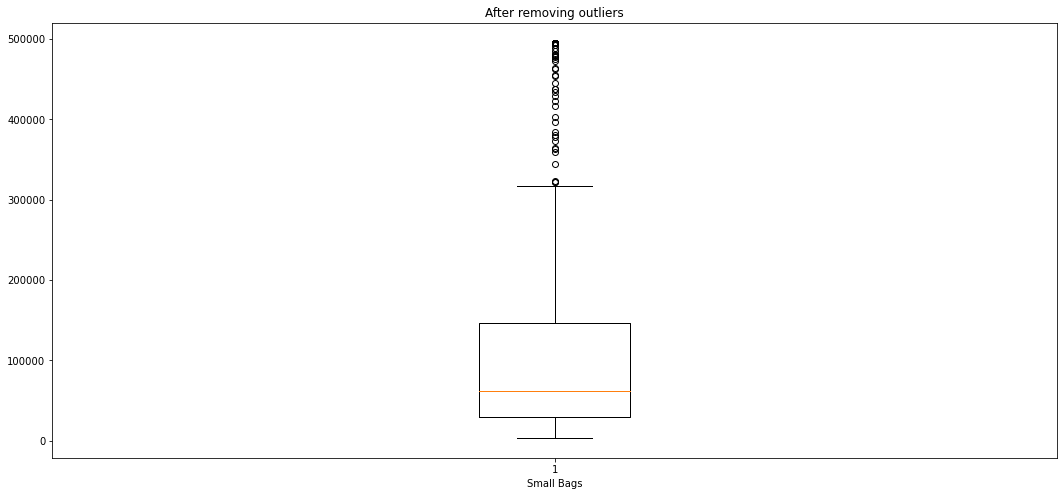

In [280]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Small Bags'])
plt.xlabel('Small Bags')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Small Bags'])
plt.xlabel('Small Bags')
plt.title('After removing outliers')
plt.show()

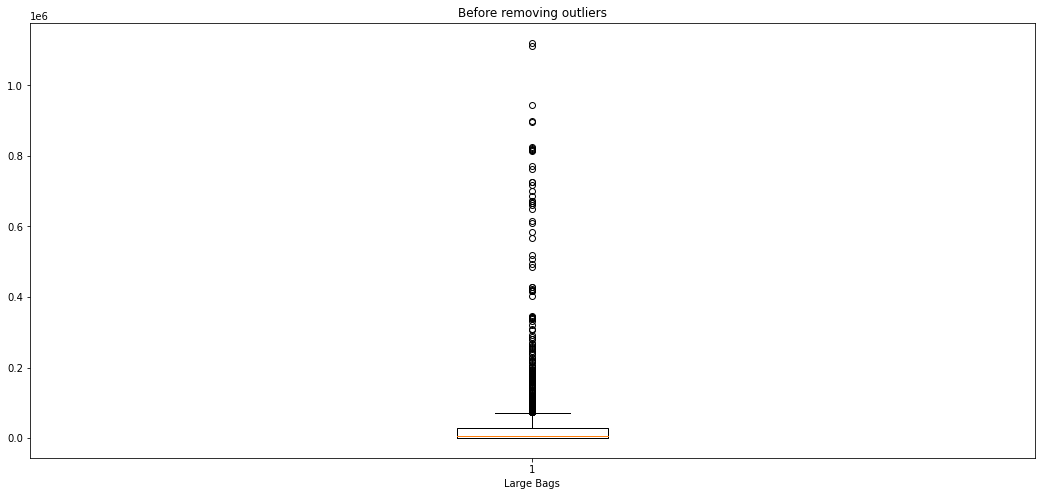

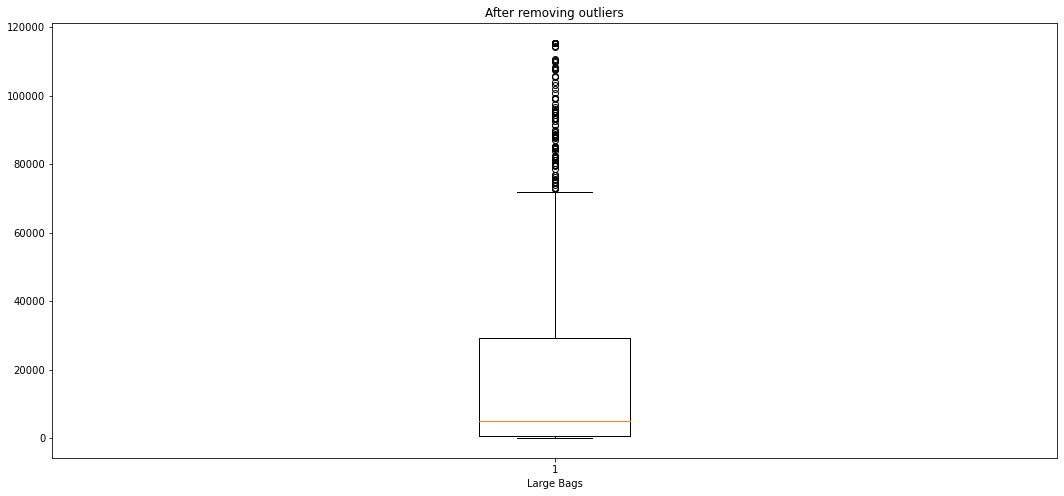

In [281]:
plt.figure(figsize=(18,8))
plt.boxplot(df['Large Bags'])
plt.xlabel('Large Bags')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['Large Bags'])
plt.xlabel('Large Bags')
plt.title('After removing outliers')
plt.show()

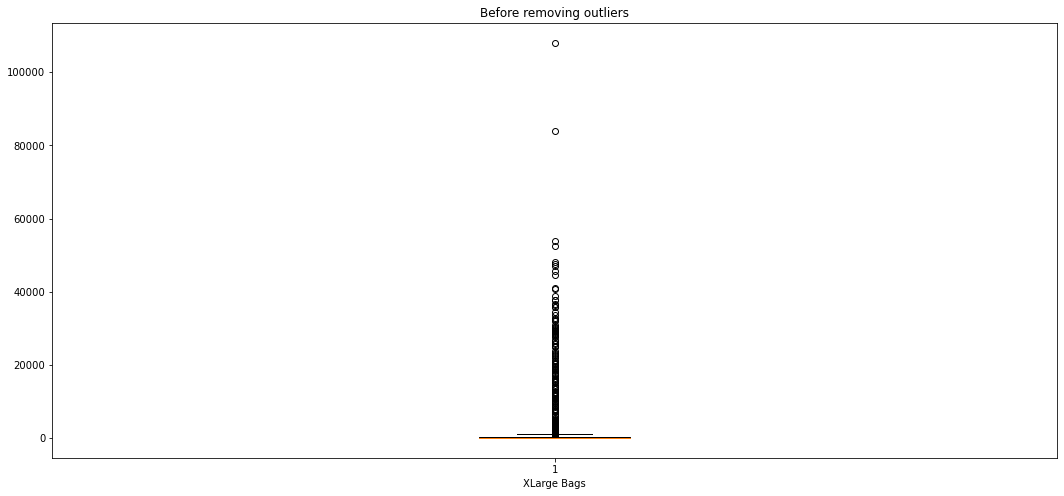

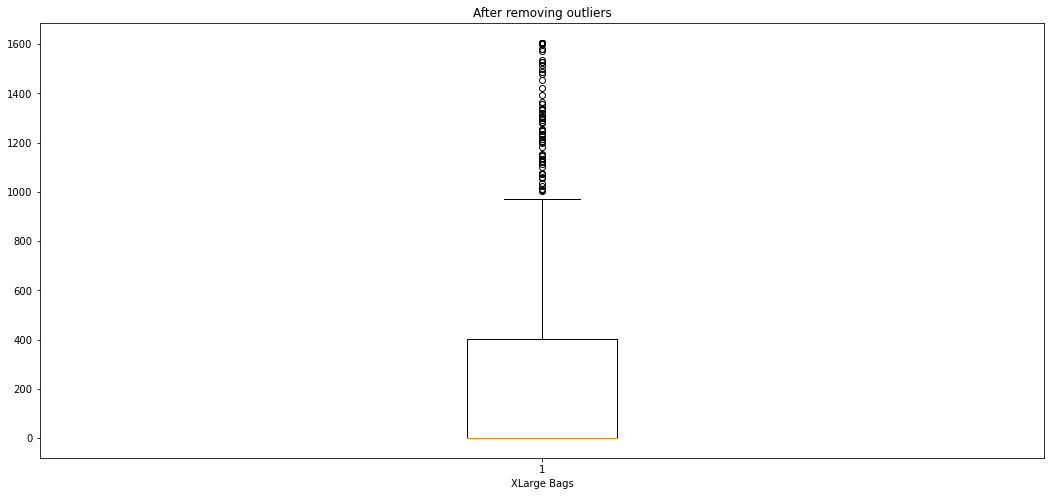

In [282]:
plt.figure(figsize=(18,8))
plt.boxplot(df['XLarge Bags'])
plt.xlabel('XLarge Bags')
plt.title('Before removing outliers')
plt.show()

plt.figure(figsize=(18,8))
plt.boxplot(data['XLarge Bags'])
plt.xlabel('XLarge Bags')
plt.title('After removing outliers')
plt.show()

Even, after removing the outliers, still we can see the outliers in few columns and some of these columns are highly
correlated with each other, hence dropping those columns

In [283]:
df=data

In [284]:
df.shape

(1517, 13)

# Splitting the dataset

In [303]:
x=df.drop('AveragePrice',axis=1)

In [304]:
x.shape

(1517, 12)

In [305]:
y=df['AveragePrice']

In [306]:
y.shape

(1517,)

In [308]:
x.skew()

Total Volume    1.588224
Small           1.623818
Large           1.608924
Xtra Large      1.529391
Total Bags      1.488528
Small Bags      1.551631
Large Bags      1.654486
XLarge Bags     1.364392
Type            0.000000
Year            1.828332
Region          0.288146
Month           0.101439
dtype: float64

# Removing the skewness

In [309]:
from sklearn.preprocessing import power_transform

In [310]:
df_x=power_transform(x)

In [311]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [312]:
df_x.skew()

Total Volume    0.000000
Small          -0.070864
Large          -0.005648
Xtra Large     -0.108883
Total Bags      0.002626
Small Bags      0.015397
Large Bags     -0.172046
XLarge Bags     0.370732
Type            0.000000
Year            0.000000
Region         -0.209568
Month          -0.139740
dtype: float64

In [313]:
x.shape

(1517, 12)

In [314]:
x=df_x

# Finding the best Random State

In [319]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [320]:
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2score=r2_score(y_test,pred)
    if r2score>maxr2:
        maxr2=r2score
        maxrs=i
print('Best accuracy is',maxr2,'for random state',i)

Best accuracy is 0.46382231502889115 for random state 199


In [297]:
x.shape

(1517, 12)

In [298]:
y.shape

(1517,)

In [329]:
lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()

model =[lr,knn,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=199)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    score=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',score.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - score.mean())
    print('\t','\t')

R2 score for LinearRegression() is -0.5700897699079575
Cross validation score for LinearRegression() is 0.0696834602548427
Difference between R2 score and Cross Validation Score is -0.6397732301628002
	 	
R2 score for KNeighborsRegressor() is 0.38350269015981897
Cross validation score for KNeighborsRegressor() is -0.130644092576449
Difference between R2 score and Cross Validation Score is 0.514146782736268
	 	
R2 score for RandomForestRegressor() is 0.7247186793467071
Cross validation score for RandomForestRegressor() is 0.12640131292841023
Difference between R2 score and Cross Validation Score is 0.5983173664182968
	 	


Difference between R2 score and cross validation is least in Random Forest Regressor

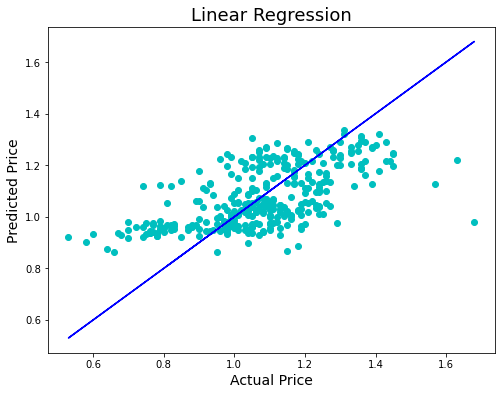

In [334]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=lr.predict(x_test),color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

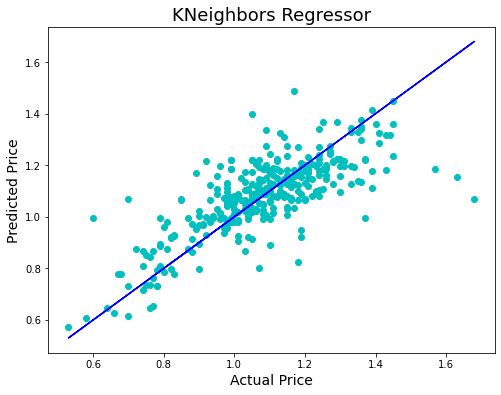

In [335]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=knn.predict(x_test),color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('KNeighbors Regressor', fontsize=18)
plt.show()

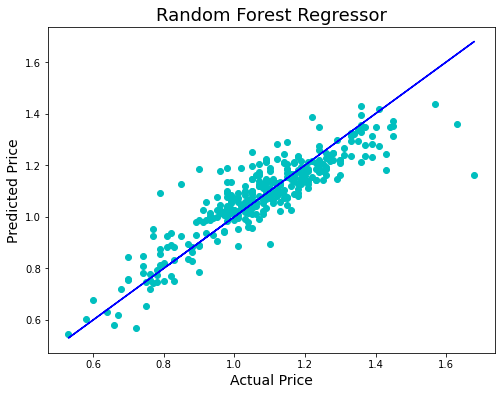

In [336]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=rf.predict(x_test),color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Random Forest Regressor', fontsize=18)
plt.show()

# Regularization

In [330]:
from sklearn.model_selection import GridSearchCV

In [337]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.00001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1e-05, 'random_state': 0}


In [338]:
ls=Lasso(alpha=1e-05,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.3674159463205684

In [339]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.06971488339196305

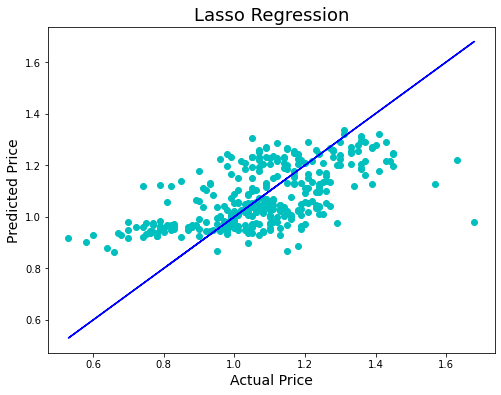

In [340]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=pred_ls,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Lasso Regression', fontsize=18)
plt.show()

# Hyperparameter tuning for Random Forest Regressor

In [345]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [352]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [343]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [346]:
rfr = RandomForestRegressor(random_state=199, max_features='auto', n_estimators= 200, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))

0.7541884327863433


In [347]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for ',rfr, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestRegressor(max_depth=8, n_estimators=200, random_state=199)  model is : 0.18803531534584983


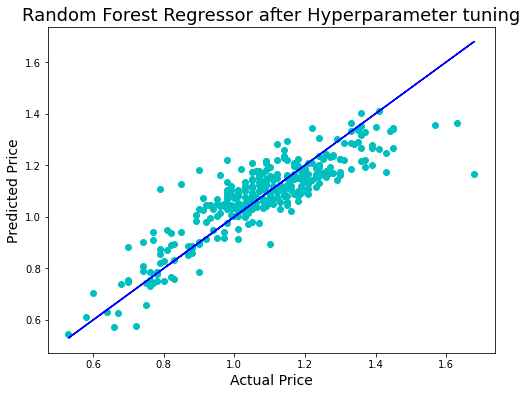

In [348]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.scatter(x=y_test,y=predrfr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Random Forest Regressor after Hyperparameter tuning', fontsize=18)
plt.show()

After hyperparameter tuning, Random Forest regressor is giving 75.4 % R2 score

# Saving the model

In [349]:
import pickle
filename='churn.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [350]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.7541884327863433


In [351]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predrfr[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
Predicted,1.293632,1.040689,1.17592,1.231399,1.107771,1.057815,1.165348,1.083828,1.267698,0.575925,...,1.224424,1.162362,1.090526,0.891168,0.974469,1.152609,1.285064,1.059324,1.073442,0.870642
Original,1.293632,1.040689,1.17592,1.231399,1.107771,1.057815,1.165348,1.083828,1.267698,0.575925,...,1.224424,1.162362,1.090526,0.891168,0.974469,1.152609,1.285064,1.059324,1.073442,0.870642
